<h1 style='background:#483D8B; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:white'><center>wheat seed Classification</center></h1>

<div style="border-radius:10px;
            border :#483D8B solid;
            background-color:#B0C4DE;
           font-size:110%;
            text-align: left">
    
## <h2 style='border:0; color:black'><center>About Data Set Information:</center></h2>
The data set can be used for the tasks of classification and cluster analysis.

***To construct the data, seven geometric parameters of wheat kernels were measured:***
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
    
    

<img src="https://eatwheat.org/wp-content/uploads/2018/05/wheats.png" width="1200" height="300">

### **<span style="color:#483D8B;">import libraries</span>**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
import warnings
warnings.simplefilter(action='ignore')

### **<span style="color:#483D8B;">import Dataset</span>**

In [3]:
# data
df=pd.read_csv('./dataset/seed_dataset.csv')
df.head()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### **<span style="color:#483D8B;">1.  Data Visualization and Exploration</span>** 

***check no of rows and columns***

In [4]:
df.shape

(210, 8)

 **<span style="color:#483D8B;">Descriptive Statistics</span>** 

In [5]:
df.describe()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


 **<span style="color:#483D8B;">details about data</span>** 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   210 non-null    float64
 1   Perimeter              210 non-null    float64
 2   Compactness            210 non-null    float64
 3   Kernel Length          210 non-null    float64
 4   Kernel Width           210 non-null    float64
 5   Asymmetry Coefficient  210 non-null    float64
 6   Kernel Groove Length   210 non-null    float64
 7   Class                  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them

In [7]:
pd.set_option('display.max_columns', None)
df.head(2)

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1


### **<span style="color:#483D8B;">Check Class Balancing</span>**

In [8]:
df['Class'].value_counts()

1    70
2    70
3    70
Name: Class, dtype: int64

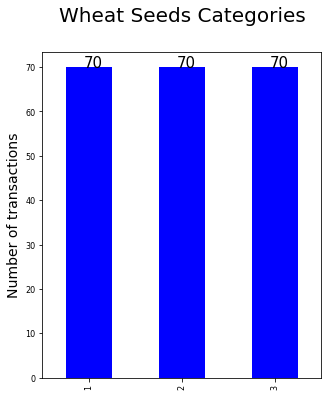

In [9]:
ax = df["Class"].value_counts().plot(kind='bar', figsize=(5, 6), fontsize=8, color='blue')
ax.set_title('Wheat Seeds Categories', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height(), str(round(i.get_height(), 2)), fontsize=15)

It appears that the data has a relatively good balance between the categories of the target column, and therefore we will not manipulate, this is natural balance.

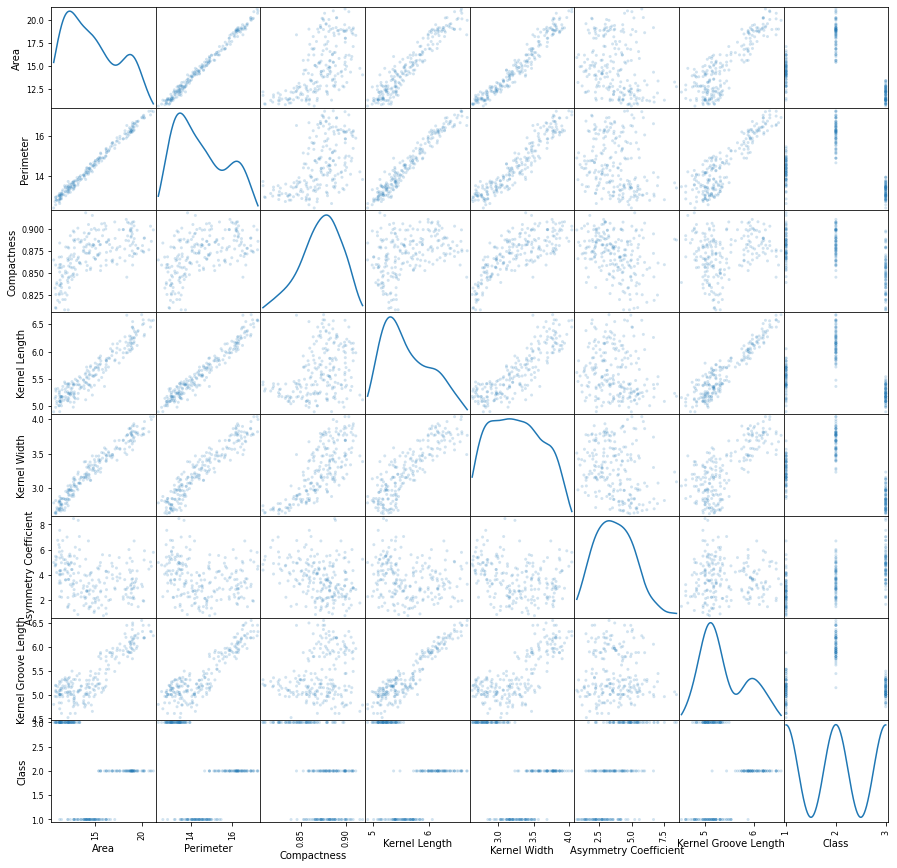

In [10]:
# Create a scatter matrix of the dataframe features
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

<AxesSubplot:>

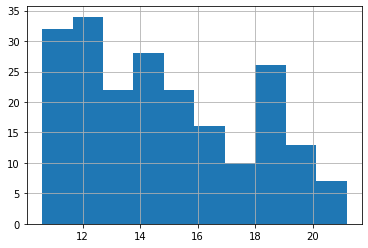

In [11]:
df['Area'].hist()

<AxesSubplot:>

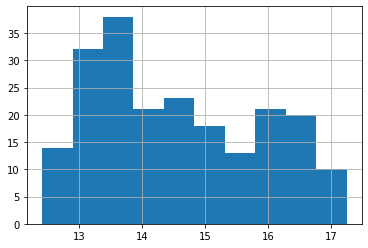

In [12]:
df['Perimeter'].hist()

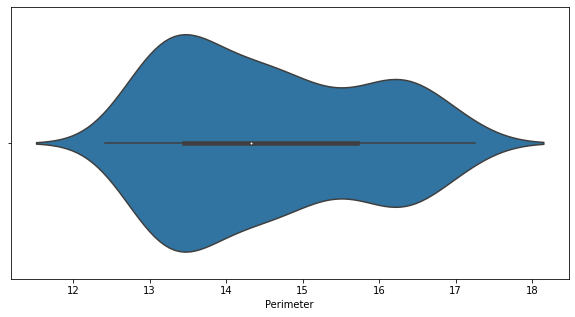

In [13]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Perimeter'])
plt.show()

**<span style="color:#483D8B;">Identify Highly Correlated Features</span>**

In [14]:
pear_corr=df.corr(method='pearson')
pear_corr

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length,Class
Area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
Perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
Compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
Kernel Length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
Kernel Width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
Asymmetry Coefficient,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
Kernel Groove Length,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
Class,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


<AxesSubplot:>

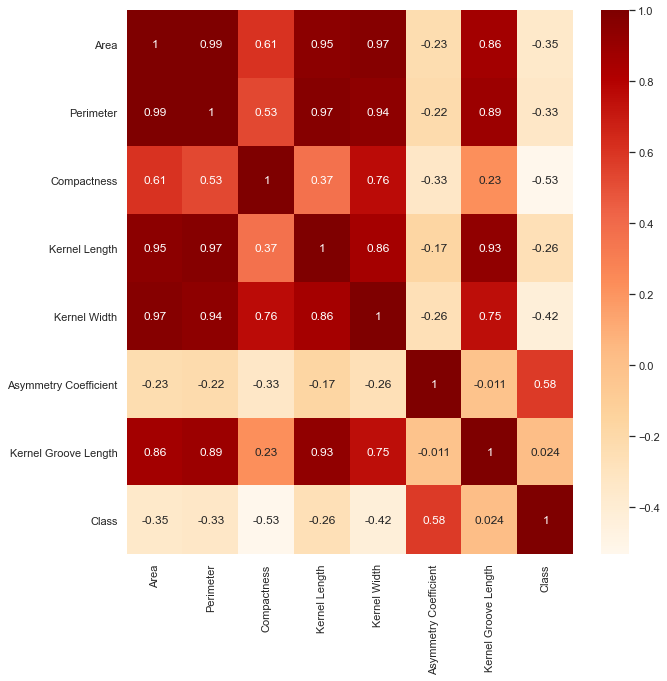

In [15]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(pear_corr, cmap="OrRd", annot=True)

In [16]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [17]:
to_drop

['Perimeter', 'Kernel Length', 'Kernel Width']

Drop Marked Features

If we add so much correlated features to the model we may cause the model to consider unnecessary features and we may have curse of high dimensionality problem

Show the different clusters distribution within our dataset
As our dataset has only few features so we will not drop any features and will keep all features 

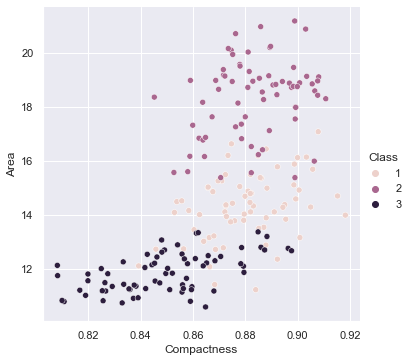

In [18]:
sns.relplot(x='Compactness', y='Area', hue='Class', data=df);

### **<span style="color:#483D8B;">2. Data Pre-processing and Cleaning</span>**

let's check the Duplicate value

In [19]:
df.duplicated().sum()

0

No duplicate record present in the dataset

Lets check missing value

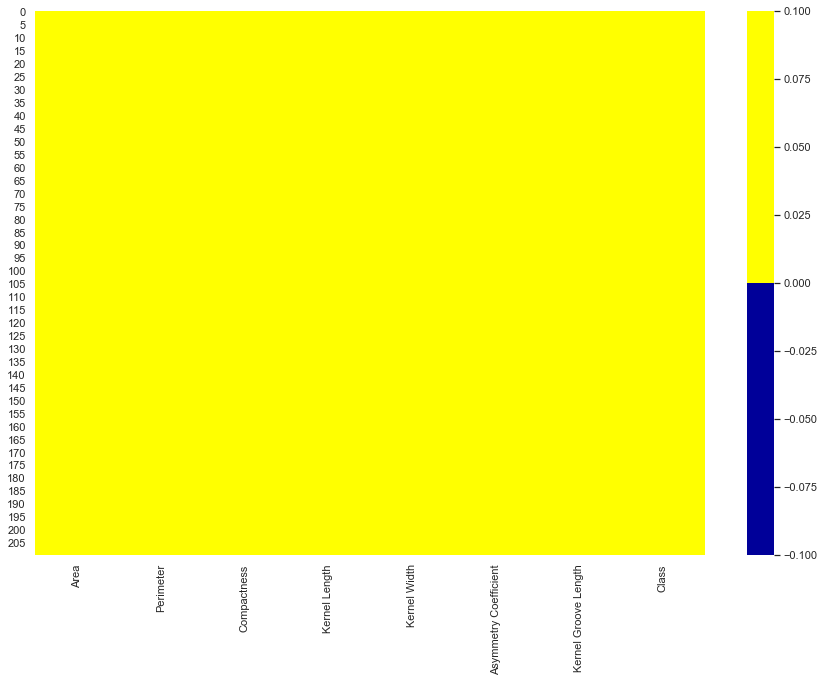

In [19]:
sns.set(rc={'figure.figsize':(15,10)})
cols =df.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

We don't have any missing value

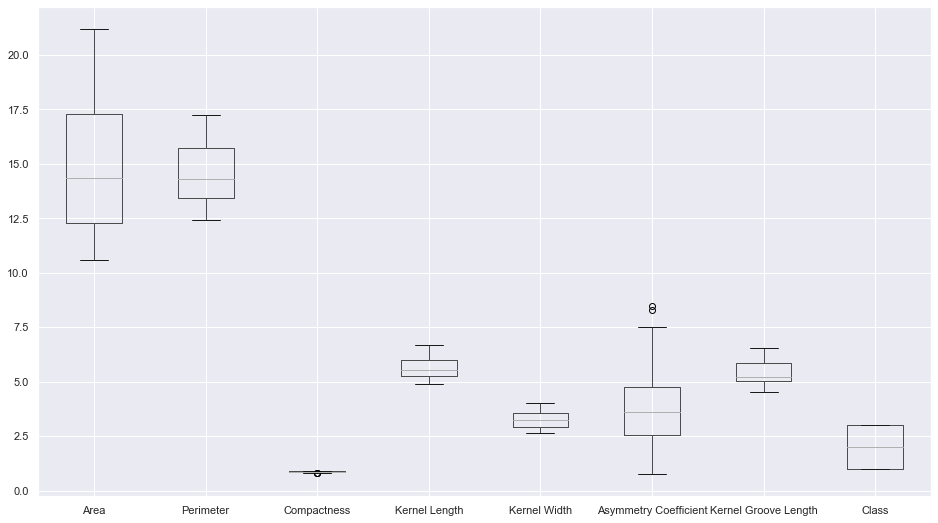

In [20]:
# dealing with outliers values
df.boxplot(figsize=(16,9));

Through the schematics that we fortified, we notice the presence of extreme values, Outliers work to affect the algorithms that we will build negatively because the difference between the lowest value and the largest value in each column is a large difference and thus a dispersion of the model occurs.

But we know very well that the decision to get rid of outliers is a decision that must be a well-thought-out decision, and in most cases we consult specialists in the case of these data, we have to consult a specialist in the Agriculture field, specifically.

But that process is not currently available to us because we are working on ready data, so we will leave that step as it is and move on to the next step.

## **<span style="color:#483D8B;">Data Splitting</span>**

In [21]:
# Here we perform an initial separation of the data, specifically the target column from the rest of the columns.
target=df["Class"]
features=df.drop(["Class"],axis=1)

#### **<span style="color:#483D8B;">Data Transformation</span>**

All data elemnts are numerical, no label data present. Therefore no transformation needed.

#### **<span style="color:#483D8B;">Data Scalling</span>**

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, hereitis between zero and one.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)

MinMaxScaler()

In [23]:
new_features = scaler.transform(features)
print(new_features)

[[0.44098206 0.50206612 0.5707804  ... 0.48610121 0.18930164 0.34515017]
 [0.40509915 0.44628099 0.66243194 ... 0.50106914 0.03288302 0.21516494]
 [0.34938621 0.34710744 0.87931034 ... 0.50392017 0.25145302 0.1506647 ]
 ...
 [0.24645892 0.25826446 0.7277677  ... 0.42908054 0.98166664 0.26440177]
 [0.11803588 0.16528926 0.39927405 ... 0.14682823 0.36834441 0.25849335]
 [0.16147309 0.19214876 0.54718693 ... 0.24518888 0.63346292 0.26784835]]


In [24]:
print(new_features.shape)

(210, 7)


### **<span style="color:#483D8B;">3.Model Building</span>**
Split the dataset into training and test sets.

data splitting is typically done to avoid overfitting/underfitting. That is an instance where a machine learning model fits its training data too well and fails to reliably fit additional data.

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

##### Case 1 : Train = 80 % Test = 20%; [ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20% ;

In [25]:
# Complete the data separation. 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_features,target,random_state=42,stratify=target)
#x_train,x_test,y_train,y_test=train_test_split(new_features,target,test_size=0.8,random_state=0)

In [26]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(157, 7) (53, 7) (157,) (53,)


### **<span style="color:#483D8B;">Decision tree classifier</span>**

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

### **<span style="color:#483D8B;">Hyper-parameter tuning  </span>**

A hyperparameter is a parameter of the model that is set before the start of learning process. Different machine learning models have different hyperparameters.

We will use the Exhaustive Grid Search technique for hyperparameter optimization. An exhaustive grid search takes in as many hyperparameters as you would like, and tries every single possible combination of the hyperparameters as well as as many cross-validations as you would like it to perform. An exhaustive grid search is a good way to determine the best hyperparameter values to use, but it can quickly become time consuming with every additional parameter value and cross-validation that you add.

In [28]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [29]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [30]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 5.87 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [31]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008746,0.004347,0.001010,0.000616,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.875,0.846154,0.948718,0.897436,0.891827,0.037541,16
1,0.002589,0.000675,0.001290,0.000374,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.875,0.846154,0.948718,0.897436,0.891827,0.037541,16
2,0.004653,0.002490,0.001033,0.000894,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.875,0.846154,0.948718,0.897436,0.891827,0.037541,16
3,0.002938,0.000697,0.001474,0.000578,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.650,0.666667,0.666667,0.666667,0.662500,0.007217,31
4,0.003025,0.000690,0.001367,0.000638,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.350,0.333333,0.333333,0.333333,0.337500,0.007217,41


In [32]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
35,0.001911,0.000429,0.001028,0.000048,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.900,0.897436,0.948718,0.897436,0.910897,0.021861,1
40,0.004500,0.001203,0.001933,0.000373,entropy,10,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.900,0.897436,0.948718,0.897436,0.910897,0.021861,1
45,0.006498,0.005284,0.001163,0.000684,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.900,0.897436,0.948718,0.897436,0.910897,0.021861,1
30,0.002391,0.000862,0.001020,0.000033,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.875,0.897436,0.948718,0.897436,0.904647,0.027043,4
25,0.002903,0.000593,0.001071,0.000178,entropy,2,5,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.875,0.871795,0.948718,0.897436,0.898237,0.030774,5


In [33]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [34]:
dt_best = grid_search.best_estimator_

In [35]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    
from sklearn import tree
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(20,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=features.columns,
                       class_names=['Class-1', "Class-2",'Class-3'],
                       filled=True,fontsize=14)

In [36]:
evaluate_model(dt_best)

Train Accuracy : 0.9617834394904459
Train Confusion Matrix:
[[50  1  2]
 [ 2 50  0]
 [ 1  0 51]]
--------------------------------------------------
Test Accuracy : 0.9433962264150944
Test Confusion Matrix:
[[14  0  3]
 [ 0 18  0]
 [ 0  0 18]]


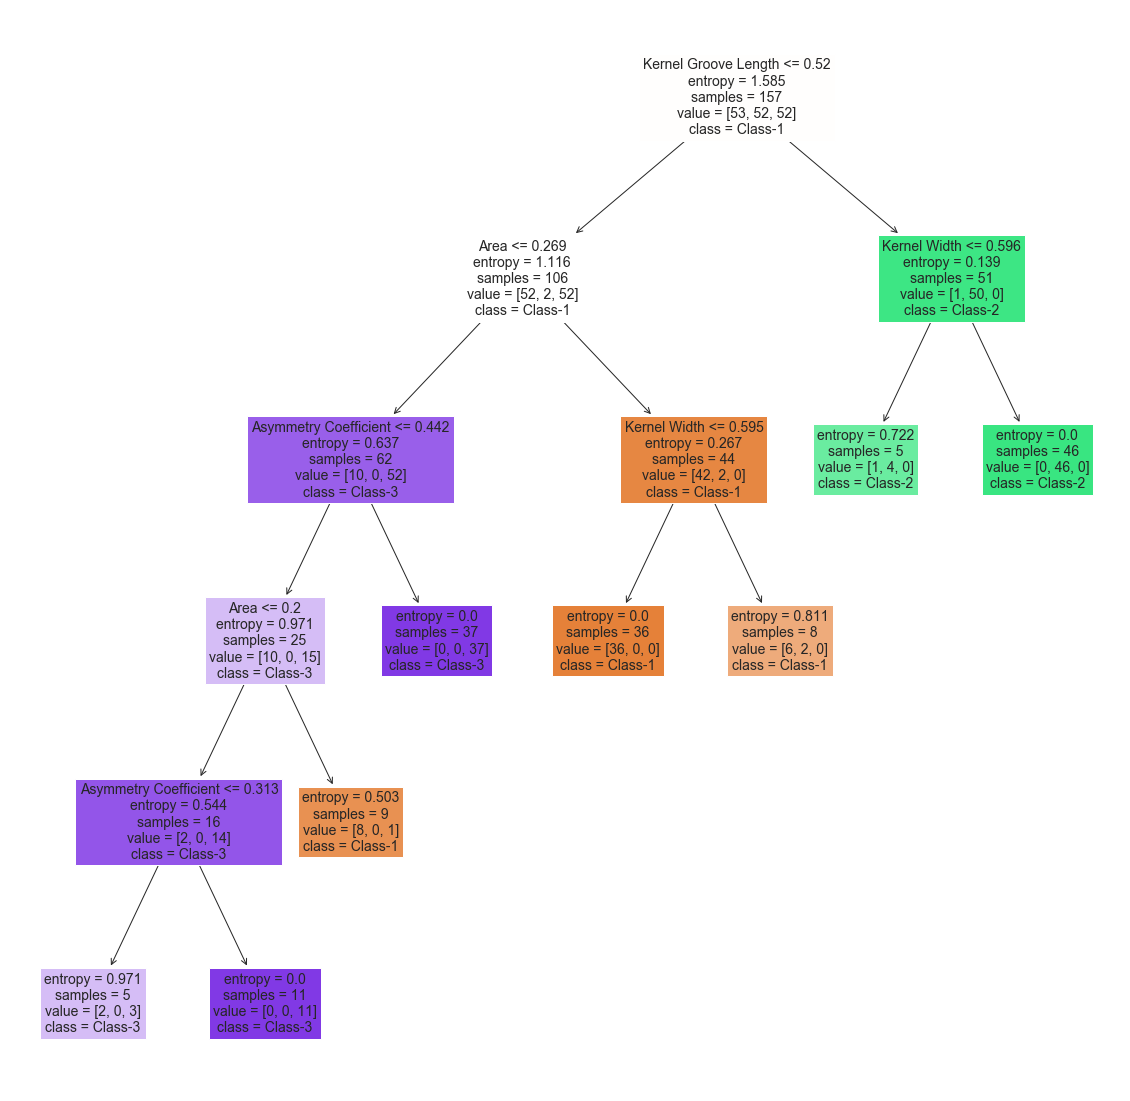

In [37]:
get_dt_graph(dt_best)

In [38]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.82      0.90        17
           2       1.00      1.00      1.00        18
           3       0.86      1.00      0.92        18

    accuracy                           0.94        53
   macro avg       0.95      0.94      0.94        53
weighted avg       0.95      0.94      0.94        53



### **<span style="color:#483D8B;">The ROC CURVE  </span>**

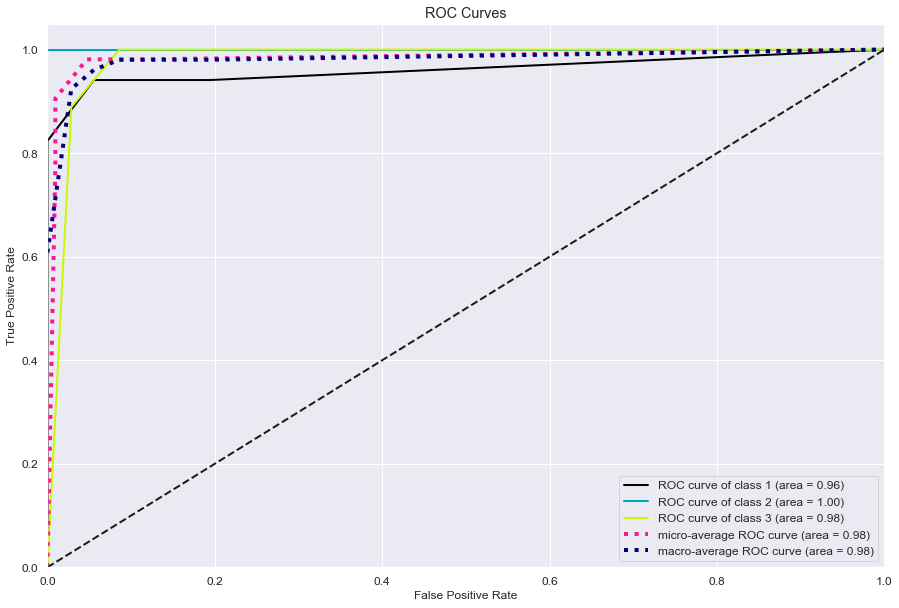

In [39]:
# The ROC AUC curve
import matplotlib.pyplot as plt
import scikitplot as skplt
predicted_probas = dt_best.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

##### Print train accuracy

Train Accuracy 0.9617834394904459


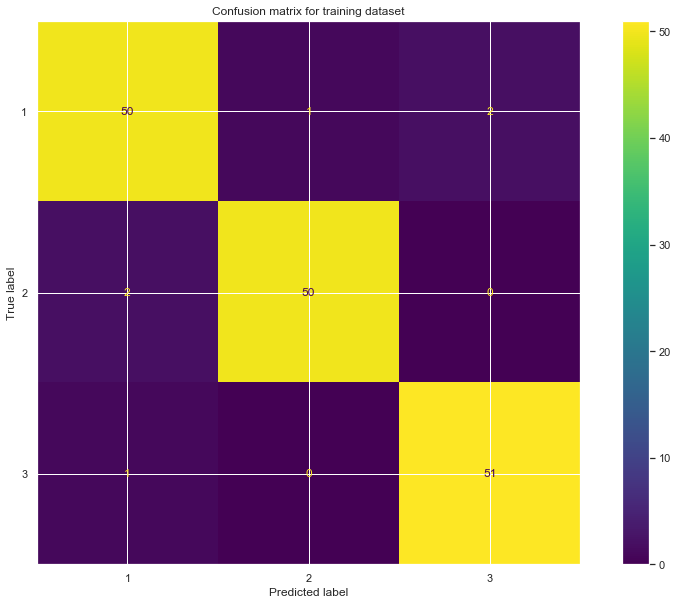

In [40]:
from sklearn.metrics import roc_curve, auc, accuracy_score,confusion_matrix,ConfusionMatrixDisplay
y_train_pred1=dt_best.predict(X_train)
ytrain = np.array(y_train)
# Print train accuracy
print("Train Accuracy", accuracy_score(y_train_pred1,ytrain))
# Plot the confusion matrix in graph
cm = confusion_matrix(y_train,y_train_pred1, labels=dt_best.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_best.classes_)
disp.plot()

# showing the matrix
plt.title("Confusion matrix for training dataset")
plt.show()

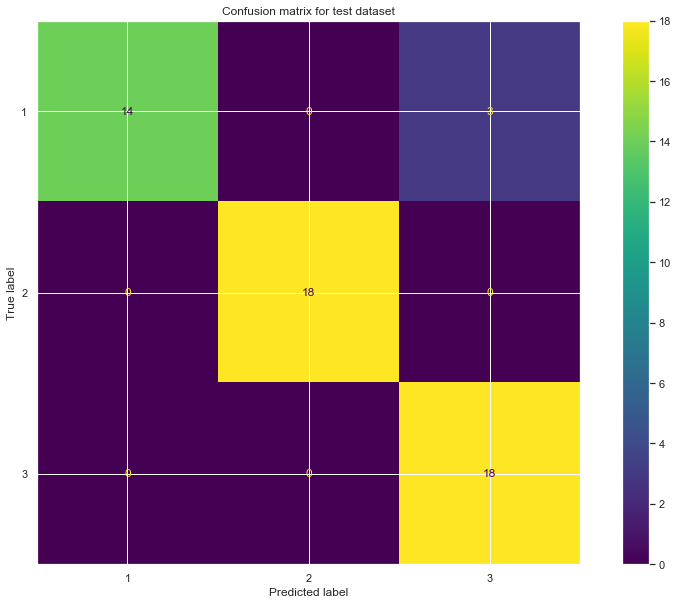

In [41]:
# Predicting test results
# calc confusion matrix
y_test_predict1 = dt_best.predict(X_test)
# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,y_test_predict1, labels=dt_best.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_best.classes_)
disp.plot()

# showing the matrix
plt.title("Confusion matrix for test dataset")
plt.show()

## **<span style="color:#483D8B;">KNN Classifier </span>**

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

### **<span style="color:#483D8B;">Hyper-parameter tuning  </span>**

In [43]:
# Create the parameter grid based on the results of random search 
params = {
    'n_neighbors': [2, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ["auto", "ball_tree","kd_tree","brute"],
    'metric' : ['minkowski','euclidean','manhattan']  
}

In [44]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knn, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [45]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 1.49 s


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [46]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003217,0.000433,0.007155,0.001086,auto,minkowski,2,uniform,"{'algorithm': 'auto', 'metric': 'minkowski', '...",0.875,0.871795,0.948718,0.923077,0.904647,0.032558,109
1,0.002554,0.001502,0.003316,0.000099,auto,minkowski,2,distance,"{'algorithm': 'auto', 'metric': 'minkowski', '...",0.850,0.897436,0.948718,0.974359,0.917628,0.047870,101
2,0.002378,0.000675,0.005403,0.001823,auto,minkowski,3,uniform,"{'algorithm': 'auto', 'metric': 'minkowski', '...",0.900,0.897436,1.000000,0.974359,0.942949,0.045159,1
3,0.003011,0.001103,0.003031,0.000694,auto,minkowski,3,distance,"{'algorithm': 'auto', 'metric': 'minkowski', '...",0.900,0.897436,1.000000,0.974359,0.942949,0.045159,1
4,0.002361,0.000505,0.007269,0.000845,auto,minkowski,5,uniform,"{'algorithm': 'auto', 'metric': 'minkowski', '...",0.925,0.897436,0.974359,0.974359,0.942788,0.033040,17


In [47]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
2,0.002378,0.000675,0.005403,0.001823,auto,minkowski,3,uniform,"{'algorithm': 'auto', 'metric': 'minkowski', '...",0.9,0.897436,1.0,0.974359,0.942949,0.045159,1
3,0.003011,0.001103,0.003031,0.000694,auto,minkowski,3,distance,"{'algorithm': 'auto', 'metric': 'minkowski', '...",0.9,0.897436,1.0,0.974359,0.942949,0.045159,1
12,0.002830,0.001115,0.007315,0.000400,auto,euclidean,3,uniform,"{'algorithm': 'auto', 'metric': 'euclidean', '...",0.9,0.897436,1.0,0.974359,0.942949,0.045159,1
13,0.003134,0.000538,0.003405,0.000750,auto,euclidean,3,distance,"{'algorithm': 'auto', 'metric': 'euclidean', '...",0.9,0.897436,1.0,0.974359,0.942949,0.045159,1
32,0.002643,0.000370,0.006418,0.000619,ball_tree,minkowski,3,uniform,"{'algorithm': 'ball_tree', 'metric': 'minkowsk...",0.9,0.897436,1.0,0.974359,0.942949,0.045159,1


In [48]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [49]:
knn_best = grid_search.best_estimator_

In [50]:
evaluate_model(knn_best)

Train Accuracy : 0.9681528662420382
Train Confusion Matrix:
[[50  0  3]
 [ 1 51  0]
 [ 1  0 51]]
--------------------------------------------------
Test Accuracy : 0.8679245283018868
Test Confusion Matrix:
[[13  2  2]
 [ 2 16  0]
 [ 1  0 17]]


In [51]:
print(classification_report(y_test, knn_best.predict(X_test)))

              precision    recall  f1-score   support

           1       0.81      0.76      0.79        17
           2       0.89      0.89      0.89        18
           3       0.89      0.94      0.92        18

    accuracy                           0.87        53
   macro avg       0.87      0.87      0.87        53
weighted avg       0.87      0.87      0.87        53



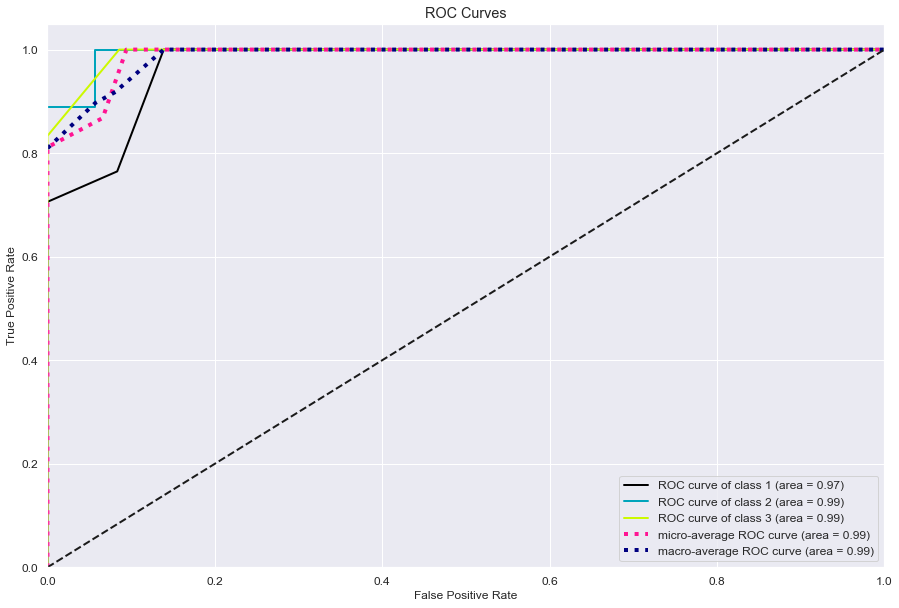

In [52]:
# The ROC AUC curve
import matplotlib.pyplot as plt
import scikitplot as skplt
predicted_probas = knn_best.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

Train Accuracy 0.9681528662420382


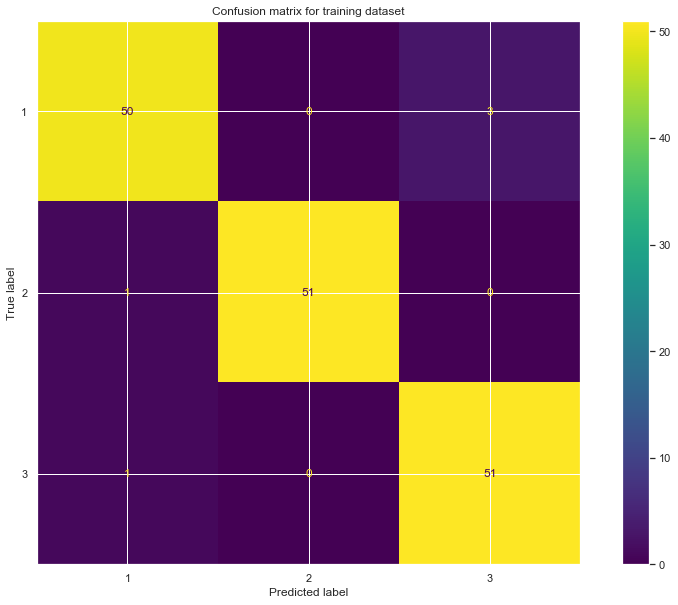

In [53]:
from sklearn.metrics import roc_curve, auc, accuracy_score,confusion_matrix,ConfusionMatrixDisplay
y_train_pred1=knn_best.predict(X_train)
ytrain = np.array(y_train)
# Print train accuracy
print("Train Accuracy", accuracy_score(y_train_pred1,ytrain))
# Plot the confusion matrix in graph
cm = confusion_matrix(y_train,y_train_pred1, labels=knn_best.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot()

# showing the matrix
plt.title("Confusion matrix for training dataset")
plt.show()

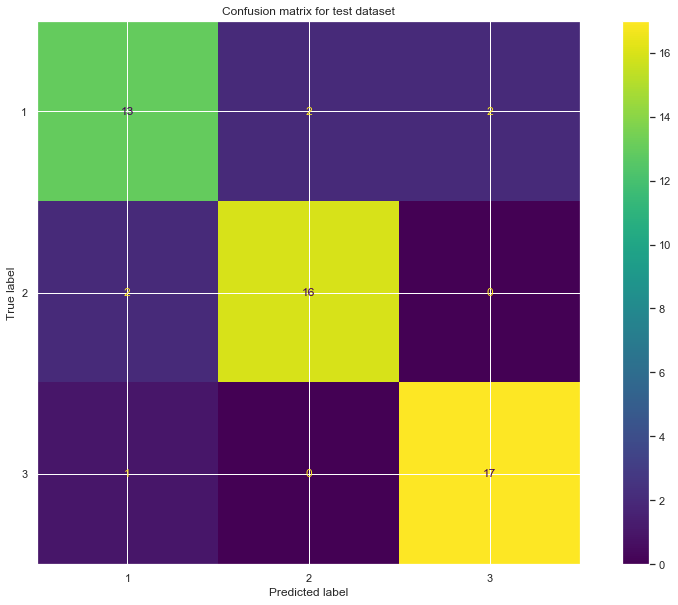

In [54]:
# Predicting test results
# calc confusion matrix
y_test_predict1 = knn_best.predict(X_test)
# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,y_test_predict1, labels=knn_best.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot()

# showing the matrix
plt.title("Confusion matrix for test dataset")
plt.show()

### **<span style="color:#483D8B;">4. Performance Evaluation</span>** 

In [55]:
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ["Model","Train Accuracy", "Test Accuracy"]
x.add_row(["Decision Tree","96.17",'94.33'])
x.add_row(["KNN", "96.81",' 86.79'])
print('Result of Decision Tree and KNN ')
print(x)

Result of Decision Tree and KNN 
+---------------+----------------+---------------+
|     Model     | Train Accuracy | Test Accuracy |
+---------------+----------------+---------------+
| Decision Tree |     96.17      |     94.33     |
|      KNN      |     96.81      |      86.79    |
+---------------+----------------+---------------+


<div style="border-radius:10px;
            border :#483D8B solid;
            background-color:#B0C4DE;
           font-size:110%;
            text-align: left">
    
## <h2 style='border:0; color:black'><center>Conclusion:</center></h2>

From above table we can say that:
Desion Tree modle is Just Right model as Training accuracy and Test Accuracy are close. 
where as KNN is   **overfit** model as Training accuracy is very high than test accuracy or 
we can also say there is almost 10% difference in accuracy when we are predicting class
on Train data (seen data by model) vs Test Data (unseen data by model)

***Finally we can say that Desion Tree Classifier model is best as it is just right model and test accuracy as well as ROC is also good ***
<img src="https://upjourney.com/wp-content/uploads/2020/04/how-to-respond-to-thank-you.jpg" width="1200" height="300">